In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data-en-hi-de-fr copy.csv', encoding='ISO-8859-1')

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df.columns = df.columns.str.strip()


In [6]:
df = df[['labels', 'English', 'German', 'French']]

In [7]:
df['text'] = df['English'].fillna('') + " " + df['German'].fillna('') + " " + df['French'].fillna('')


In [8]:
df['text'] = df['text'].str.strip()
df = df[['labels', 'text']]

In [9]:
print(df.shape)
df.head()

(5572, 2)


,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni... Ok Lar... joking...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.sample(15)

,labels,text
956,ham,Sorry i now then c ur msg... Yar lor so poor t...
9,spam,Had your mobile 11 months or more? U R entitle...
4567,ham,Should i buy him a blackberry bold 2 or torch....
4800,ham,I dont know why she.s not getting your message...
4462,ham,Thanks again for your reply today. When is ur ...
3007,ham,Also hi wesley how've you been Auch hallo Wesl...
2557,ham,Fuck babe ... What happened to you ? How come ...
209,ham,You please give us connection today itself bef...
2061,ham,I did. One slice and one breadstick. Lol Ein S...
4143,ham,Infact happy new year. How are you where are y...


In [11]:
df.shape

(5572, 2)

## 1. Data Cleaning

In [12]:
import re
import string


In [13]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
df['text'] = df['text'].apply(clean_text)
df.head()


,labels,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni ok lar joking wif u on...
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say u ...
4,ham,nah i dont think he goes to usf he lives aroun...


In [16]:
# Remove rows where text became empty after cleaning
df = df[df['text'] != '']
print(df.shape)


(5569, 2)


In [17]:
print("Before:", df.columns.tolist())
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True, errors='ignore')
print("After: ", df.columns.tolist())


Before: ['labels', 'text']
After:  ['labels', 'text']


In [18]:

df.sample(5)

,labels,text
3417,ham,uhhhhrmm isnt having tb test bad when youre si...
4919,ham,sitting in mu waiting for everyone to get out ...
3944,ham,i got a call from a landline number i am asked...
620,ham,let there be snow let there be snow this kind ...
854,ham,ah poor babyhope urfeeling bettersn luv probth...


In [19]:
# # renaming the cols
# df.rename(columns={'v1':'target','v2':'text'},inplace=True)
# df.sample(5)

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



In [21]:
df['labels'] = encoder.fit_transform(df['labels'])

In [22]:

df.head()

,labels,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni ok lar joking wif u on...
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say u ...
4,0,nah i dont think he goes to usf he lives aroun...


In [23]:
df.isnull().sum()


labels    0
text      0
dtype: int64

In [24]:
df.duplicated().sum()


434

In [25]:
df = df.drop_duplicates(keep='first')


In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5135, 2)

## 2.EDA

In [28]:
df.head()

,labels,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni ok lar joking wif u on...
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say u ...
4,0,nah i dont think he goes to usf he lives aroun...


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [30]:
print("Dataset shape:", df.shape)

Dataset shape: (5135, 2)


In [31]:
print("Label counts:")
print(df['labels'].value_counts())

Label counts:
labels
0    4508
1     627
Name: count, dtype: int64


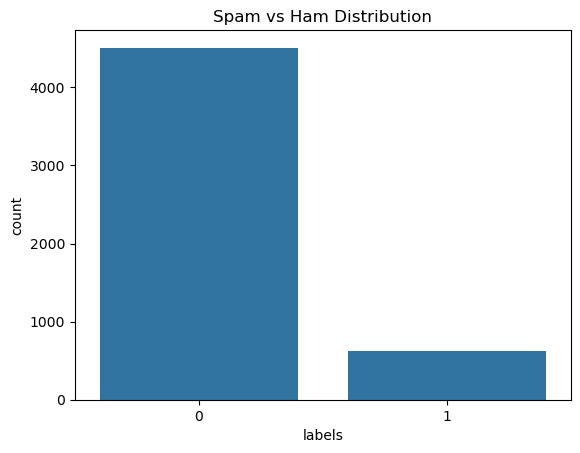

In [32]:
sns.countplot(x='labels', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

In [33]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_characters'] = df['text'].apply(len)


In [35]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [36]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [37]:
print(df[['num_characters', 'num_words', 'num_sentences']].describe())


       num_characters    num_words  num_sentences
count     5135.000000  5135.000000         5135.0
mean       236.380915    44.207011            1.0
std        175.952179    32.890964            0.0
min          8.000000     3.000000            1.0
25%        108.000000    21.000000            1.0
50%        180.000000    35.000000            1.0
75%        340.000000    62.000000            1.0
max       2797.000000   494.000000            1.0


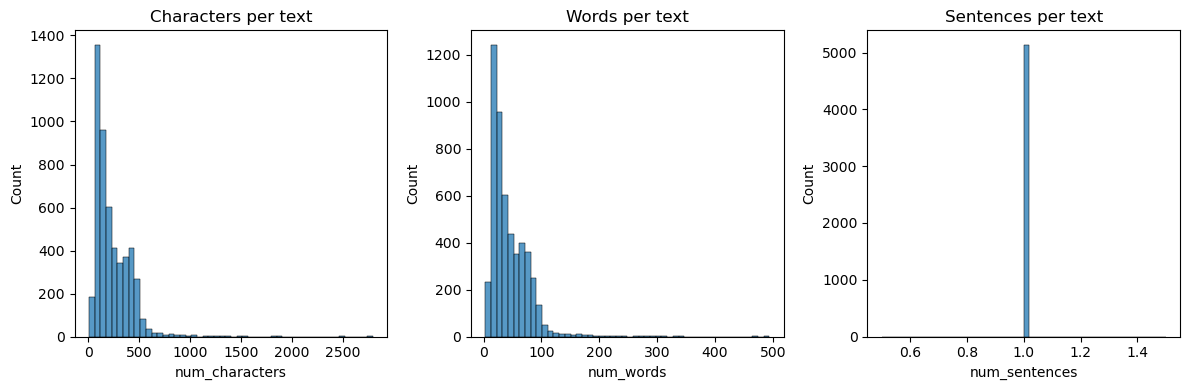

In [38]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(df['num_characters'], bins=50)
plt.title("Characters per text")

plt.subplot(1,3,2)
sns.histplot(df['num_words'], bins=50)
plt.title("Words per text")

plt.subplot(1,3,3)
sns.histplot(df['num_sentences'], bins=50)
plt.title("Sentences per text")

plt.tight_layout()
plt.show()


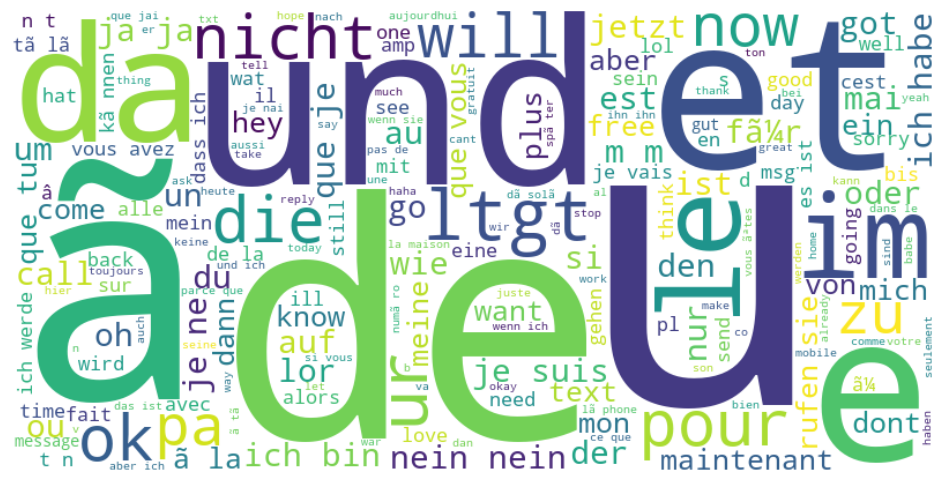

In [39]:
from wordcloud import WordCloud

# Combine all text
all_text = ' '.join(df['text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [40]:
df['labels'].value_counts()


labels
0    4508
1     627
Name: count, dtype: int64

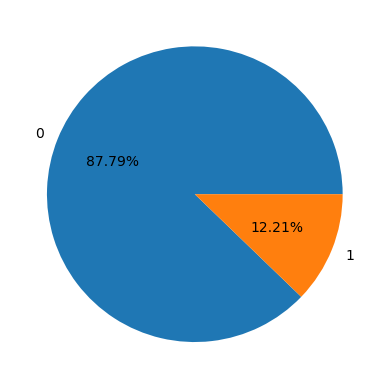

In [41]:
import matplotlib.pyplot as plt

# Automatically get label names
label_counts = df['labels'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct="%0.2f%%")
plt.show()


In [42]:
import nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# Convert all to string and handle NaN
df['text'] = df['text'].fillna('').astype(str)

# Now safely calculate
df['num_characters'] = df['text'].apply(len)


In [45]:
df.head()

,labels,text,num_characters,num_words,num_sentences
0,0,go until jurong point crazy available only in ...,323,62,1
1,0,ok lar joking wif u oni ok lar joking wif u on...,84,21,1
2,1,free entry in a wkly comp to win fa cup final ...,396,74,1
3,0,u dun say so early hor u c already then say u ...,128,32,1
4,0,nah i dont think he goes to usf he lives aroun...,182,42,1


In [46]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- new dependency in newer NLTK versions
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...


[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
df.head()

,labels,text,num_characters,num_words,num_sentences
0,0,go until jurong point crazy available only in ...,323,62,1
1,0,ok lar joking wif u oni ok lar joking wif u on...,84,21,1
2,1,free entry in a wkly comp to win fa cup final ...,396,74,1
3,0,u dun say so early hor u c already then say u ...,128,32,1
4,0,nah i dont think he goes to usf he lives aroun...,182,42,1


In [48]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5135.000000,5135.000000,5135.0
mean,236.380915,44.207011,1.0
std,175.952179,32.890964,0.0
min,8.000000,3.000000,1.0
25%,108.000000,21.000000,1.0
50%,180.000000,35.000000,1.0
75%,340.000000,62.000000,1.0
max,2797.000000,494.000000,1.0


In [49]:
df[df['labels'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4508.000000,4508.000000,4508.0
mean,216.847382,41.312112,1.0
std,175.782800,33.502315,0.0
min,8.000000,3.000000,1.0
25%,104.000000,20.000000,1.0
50%,159.000000,30.000000,1.0
75%,278.250000,53.000000,1.0
max,2797.000000,494.000000,1.0


In [50]:
df[df['labels'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,627.000000,627.000000,627.0
mean,376.822967,65.020734,1.0
std,94.521777,17.235390,0.0
min,11.000000,3.000000,1.0
25%,332.500000,57.000000,1.0
50%,398.000000,68.000000,1.0
75%,439.500000,77.000000,1.0
max,613.000000,101.000000,1.0


<Axes: xlabel='num_words', ylabel='Count'>

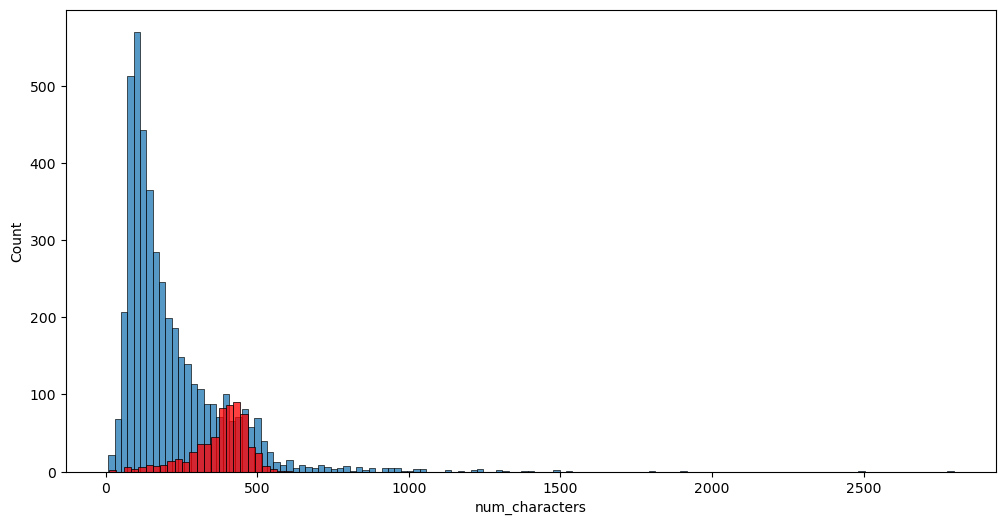

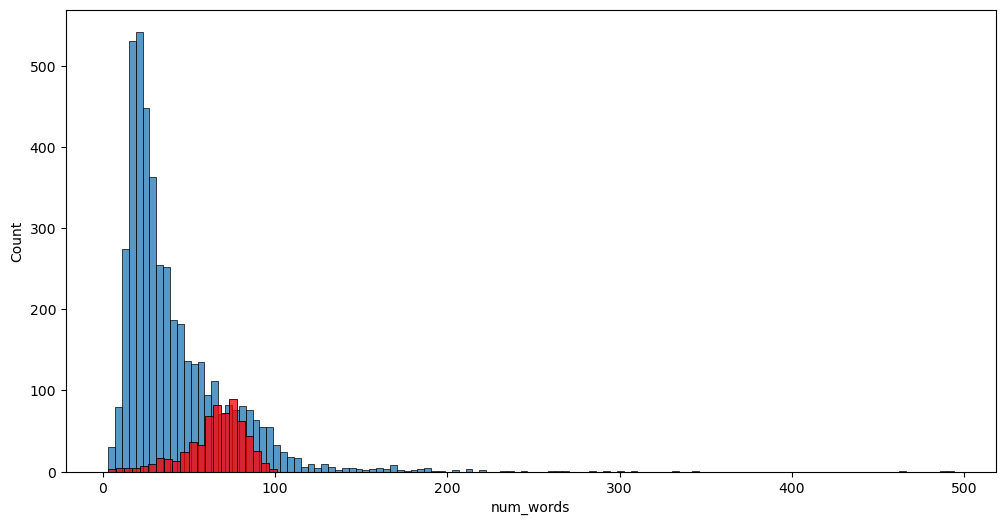

In [51]:
# for number of characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels'] == 0]['num_characters'])
sns.histplot(df[df['labels'] == 1]['num_characters'], color='red')

# for number of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels'] == 0]['num_words'])
sns.histplot(df[df['labels'] == 1]['num_words'], color='red')


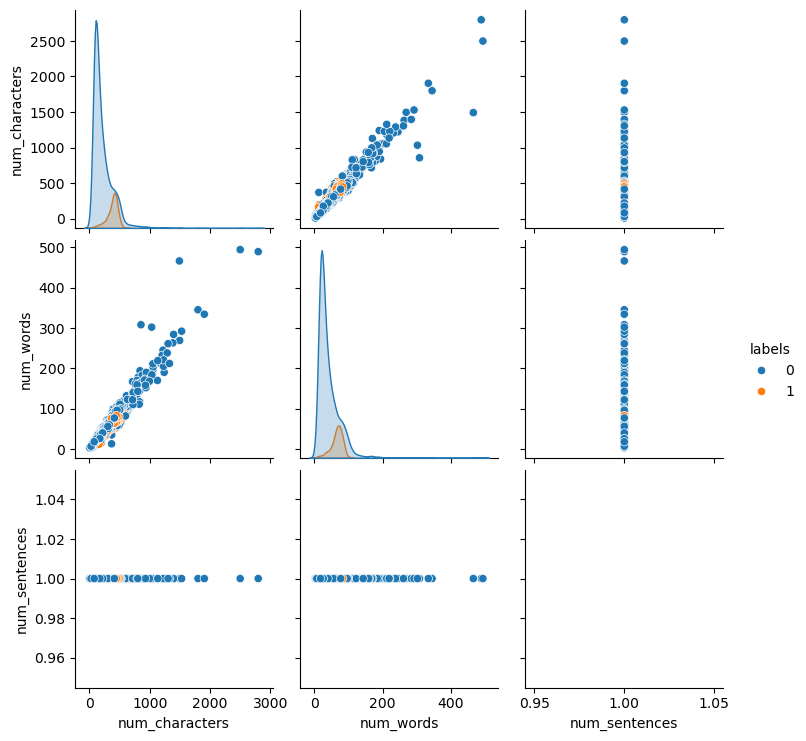

In [52]:
sns.pairplot(df, hue='labels')


## 3. Data Preprocessing
#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Stemming

In [53]:
import re
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'\S+@\S+', '', text)        # remove emails
    text = re.sub(r'\d+', '', text)            # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df['text'] = df['text'].apply(clean_text)


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['labels'] = encoder.fit_transform(df['labels'])


In [55]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [57]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [58]:

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('omw-1.4', quiet=True)  # optional, helps with some corpora
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [59]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [61]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():  # keep only words/numbers
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(ps.stem(i))

    return " ".join(y)


In [62]:
df['transformed_text'] = df['text'].apply(transform_text)


In [63]:

df.head()

,labels,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,323,62,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni ok lar joking wif u on...,84,21,1,ok lar joke wif u oni ok lar joke wif u oni ja...
2,1,free entry in a wkly comp to win fa cup final ...,396,74,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say so early hor u c already then say u ...,128,32,1,u dun say earli hor u c alreadi say u dun sage...
4,0,nah i dont think he goes to usf he lives aroun...,182,42,1,nah dont think goe usf live around though nein...


In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [65]:
spam_wc = wc.generate(df[df['labels'] == 1]['transformed_text'].str.cat(sep=" "))

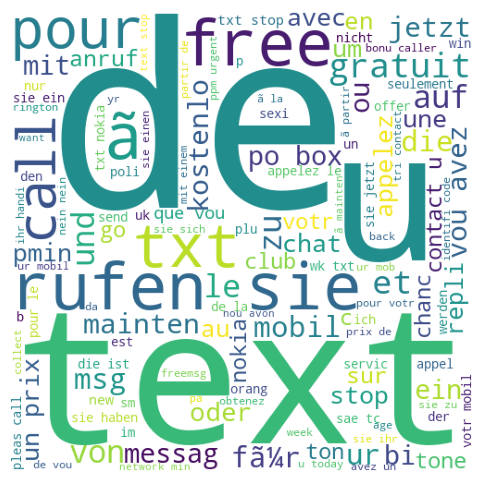

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [67]:
ham_wc = wc.generate(df[df['labels'] == 0]['transformed_text'].str.cat(sep=" "))


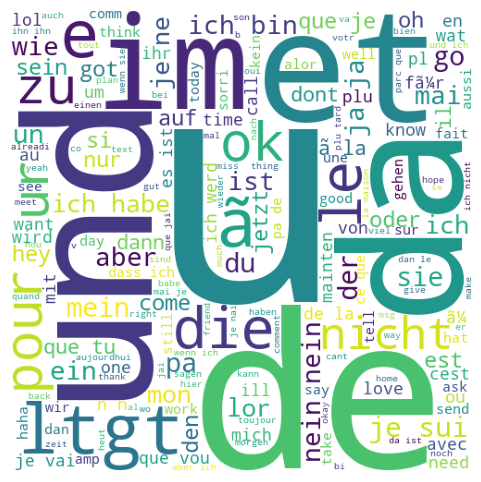

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [69]:

df.head()

,labels,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,323,62,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni ok lar joking wif u on...,84,21,1,ok lar joke wif u oni ok lar joke wif u oni ja...
2,1,free entry in a wkly comp to win fa cup final ...,396,74,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say so early hor u c already then say u ...,128,32,1,u dun say earli hor u c alreadi say u dun sage...
4,0,nah i dont think he goes to usf he lives aroun...,182,42,1,nah dont think goe usf live around though nein...


In [70]:
spam_corpus = []
for msg in df[df['labels'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
len(spam_corpus)

33216

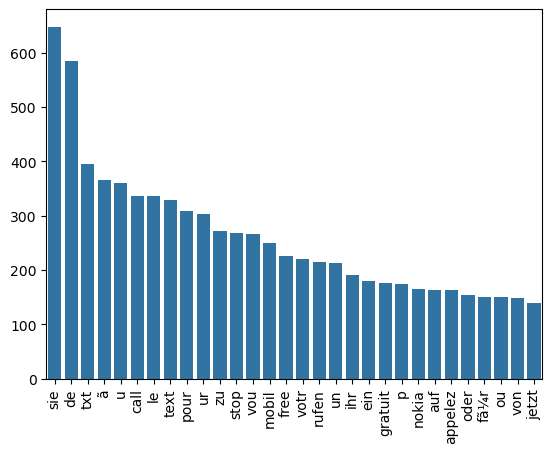

In [72]:
from collections import Counter

common_words = Counter(spam_corpus).most_common(30)
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
# Ham corpus
ham_corpus = []
for msg in df[df['labels'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [74]:
len(ham_corpus)

148623

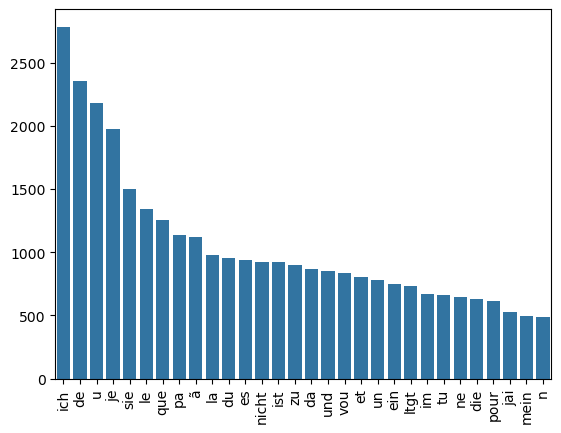

In [75]:
common_words = Counter(ham_corpus).most_common(30)
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation='vertical')
plt.show()

In [76]:
# Text Vectorization
# using Bag of Words
df.head()

,labels,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,323,62,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni ok lar joking wif u on...,84,21,1,ok lar joke wif u oni ok lar joke wif u oni ja...
2,1,free entry in a wkly comp to win fa cup final ...,396,74,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say so early hor u c already then say u ...,128,32,1,u dun say earli hor u c alreadi say u dun sage...
4,0,nah i dont think he goes to usf he lives aroun...,182,42,1,nah dont think goe usf live around though nein...


## 4. Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [78]:
X = df['transformed_text']  # use cleaned + stemmed text
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [79]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Optional: save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [80]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9620253164556962
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       902
           1       0.99      0.70      0.82       125

    accuracy                           0.96      1027
   macro avg       0.97      0.85      0.90      1027
weighted avg       0.96      0.96      0.96      1027



In [81]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9746835443037974
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       902
           1       0.99      0.80      0.88       125

    accuracy                           0.97      1027
   macro avg       0.98      0.90      0.94      1027
weighted avg       0.98      0.97      0.97      1027



In [82]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9746835443037974
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       902
           1       1.00      0.79      0.88       125

    accuracy                           0.97      1027
   macro avg       0.99      0.90      0.93      1027
weighted avg       0.98      0.97      0.97      1027



In [83]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)


In [84]:
import sys
print(sys.executable)   # should match your conda env python
import torch, transformers, accelerate
print(torch.__version__, transformers.__version__, accelerate.__version__)


c:\Users\rishi\anaconda3\python.exe
2.9.0+cpu 4.57.1 1.10.1


In [85]:
from transformers import BertTokenizer, BertForSequenceClassification

# Use multilingual BERT for English, German, French
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df['transformed_text'], df['labels'],
    test_size=0.2,
    random_state=42,
    stratify=df['labels']
)


In [89]:
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = int(self.labels.iloc[idx])
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_dataset = SpamDataset(X_train, y_train, tokenizer)
val_dataset = SpamDataset(X_val, y_val, tokenizer)


In [90]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir='./logs'
)


In [91]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}


In [92]:
import os
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer

model_dir = "bert_spam_model"

# Load model and tokenizer
if os.path.exists(model_dir) and os.listdir(model_dir):
    print(" Model already trained and saved. Loading...")
    model = AutoModelForSequenceClassification.from_pretrained(model_dir)
    tokenizer = AutoTokenizer.from_pretrained(model_dir)
else:
    print(" Training model...")
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )
    trainer.train()
    model.save_pretrained(model_dir)
    tokenizer.save_pretrained(model_dir)
    print(" Model training complete and saved to", model_dir)

#  Recreate Trainer for evaluation (even if model is pre-trained)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

 Model already trained and saved. Loading...


In [93]:
from transformers import Trainer, AutoModelForSequenceClassification, AutoTokenizer

model_dir = "bert_spam_model"

# Load the trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Recreate Trainer (no need to retrain)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,   # Use training dataset here
    eval_dataset=train_dataset,    # Evaluate on training data
    compute_metrics=compute_metrics
)

# Evaluate on training dataset
results_train = trainer.evaluate(eval_dataset=train_dataset)

print("\n Training Data Evaluation Results:")
for key, value in results_train.items():
    print(f"{key}: {value:.4f}")


c:\Users\rishi\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



 Training Data Evaluation Results:
eval_loss: 0.0353
eval_model_preparation_time: 0.0000
eval_accuracy: 0.9915
eval_f1: 0.9652
eval_precision: 0.9624
eval_recall: 0.9681
eval_runtime: 639.3727
eval_samples_per_second: 6.4250
eval_steps_per_second: 0.4020


In [94]:
from transformers import Trainer, AutoModelForSequenceClassification, AutoTokenizer

# Define model path
model_dir = "bert_spam_model"

# Load the trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

#  Recreate Trainer for evaluation on test dataset
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,   # 20% test data
    compute_metrics=compute_metrics
)

#  Evaluate on test dataset
results_test = trainer.evaluate(eval_dataset=val_dataset)

print("\n Test Data Evaluation Results:")
for key, value in results_test.items():
    print(f"{key}: {value:.4f}")


c:\Users\rishi\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



 Test Data Evaluation Results:
eval_loss: 0.0791
eval_model_preparation_time: 0.0161
eval_accuracy: 0.9825
eval_f1: 0.9256
eval_precision: 0.9573
eval_recall: 0.8960
eval_runtime: 128.8785
eval_samples_per_second: 7.9690
eval_steps_per_second: 0.5040


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['transformed_text'], df['labels'], 
    test_size=0.2, random_state=42, stratify=df['labels']
)


In [97]:
import torch

y_true = y_test.tolist()
y_pred = []

model.eval()

for text in X_test.tolist():
    inputs = tokenizer([text], 
                       padding=True, truncation=True, 
                       return_tensors="pt", max_length=128)

    with torch.no_grad():
        logits = model(**inputs).logits

    pred_class = torch.argmax(logits, dim=1).item()
    y_pred.append(pred_class)


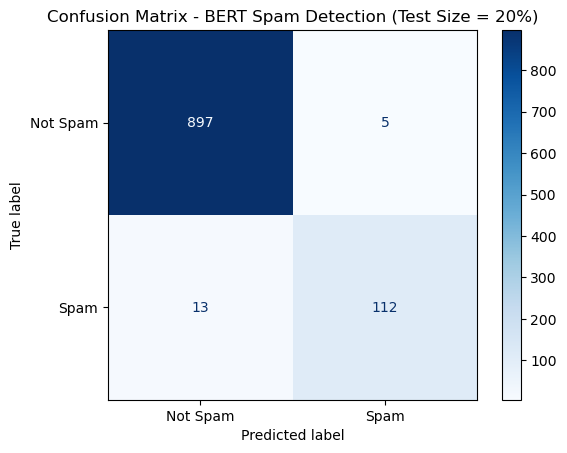

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Spam", "Spam"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - BERT Spam Detection (Test Size = 20%)")
plt.show()


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import torch
from transformers import Trainer, AutoModelForSequenceClassification, AutoTokenizer

# Load saved model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("bert_spam_model")
tokenizer = AutoTokenizer.from_pretrained("bert_spam_model")
model.eval()

# Use the same dataset (already tokenized)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies, f1_scores = [], []
fold = 1

for train_idx, test_idx in kf.split(range(len(dataset))):
    print(f"\n Evaluating Fold {fold}...")
    test_subset = torch.utils.data.Subset(dataset, test_idx)
    trainer = Trainer(model=model, compute_metrics=compute_metrics)
    results = trainer.evaluate(eval_dataset=test_subset)
    accuracies.append(results["eval_accuracy"])
    f1_scores.append(results["eval_f1"])
    print(f" Fold {fold}: Accuracy={results['eval_accuracy']*100:.2f}% | F1={results['eval_f1']:.4f}")
    fold += 1

print("\n📊 Cross-Validation Summary (Evaluation Only):")
print(f"Average Accuracy: {np.mean(accuracies)*100:.2f}% ± {np.std(accuracies)*100:.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



🔍 Evaluating Fold 1...


✅ Fold 1: Accuracy=95.39% | F1=0.8026

🔍 Evaluating Fold 2...


c:\Users\rishi\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Fold 2: Accuracy=94.85% | F1=0.7850

🔍 Evaluating Fold 3...


c:\Users\rishi\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Fold 3: Accuracy=94.41% | F1=0.7630

🔍 Evaluating Fold 4...


c:\Users\rishi\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Fold 4: Accuracy=95.06% | F1=0.7673

🔍 Evaluating Fold 5...


c:\Users\rishi\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Fold 5: Accuracy=95.45% | F1=0.7940

📊 Cross-Validation Summary (Evaluation Only):
Average Accuracy: 95.03% ± 0.38
Average F1 Score: 0.7824 ± 0.0152


spam

You have won a guaranteed Â£200 award or even Â£1000 cashto claim UR award call free on 08000407165 (18+) 2 stop getstop on 88222 PHP. RG21 4JX!!

Vous Ãªtes maintenant dÃ©sabonnÃ© Ã  tous les services. Obtenez des tonnes de filles sexy ou de bouffons directement sur votre tÃ©lÃ©phone! allez Ã  http://gotbabes.co.uk. Pas d'abonnements.


PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04.

not spam

D'habitude, la personne est inconsciente, c'est chez les enfants, mais chez les adultes, elle peut se comporter anormalement.

So many people seems to be special at first sight, But only very few will remain special to you till your last sight. Maintain them till life ends. Sh!jas!

Wat macht einige Leute lieber ist nicht nur de GlÃ¼ck dat u fÃ¼hlen, wenn u sie treffen, aber de Schmerz u fÃ¼hlen, wenn u miss dem!!!